In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("extracted_data.csv")

In [3]:
df.head()

,taxi_group_name,driver_full_name,disabled,deleted,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating
0,"Walsh, Hammond and Craig",Bruce Marshall,0,1,7,6,0,0.666398,-0.252875,0.279009,1.892210,9,38,40,20,22
1,"Walsh, Hammond and Craig",Carol Holmes,0,0,9,4,0,-1.177850,-1.560460,-1.211520,-0.510155,8,16,28,43,39
2,"Walsh, Hammond and Craig",Jay Bailey,0,0,16,6,0,-0.557925,0.083300,0.596134,0.257793,5,12,25,39,26
3,"Walsh, Hammond and Craig",Aimee Smith,0,1,3,4,0,-0.787186,-0.484124,0.966867,0.548890,8,8,16,52,34
4,"Walsh, Hammond and Craig",Hayley Hall,0,0,14,1,0,0.518161,-0.108167,-0.025077,-0.133834,22,32,53,16,13


In [4]:
"""
Get the drivers which are not disabled or deleted - so only active drivers
"""
active_drivers = df[(df['disabled'] == 0) & (df['deleted'] == 0)].copy()
active_drivers.drop(columns = ['disabled','deleted'], inplace=True)

In [5]:
"""
Normalise the ratings to a new column based on positive and negative ratings. 
Positive ratings - rating equal and above 4
Negative ratings - rating equal and below 2
Neutral ratings - 3 as the experience with the driver is neutral 
 ** may have included in the calculation as saw that there are more neutral ratings to the driver but 
"""
positive_ratings = active_drivers['no_of_4_star_rating'] + active_drivers['no_of_5_star_rating']
negative_ratings = active_drivers['no_of_1_star_rating'] + active_drivers['no_of_2_star_rating']
active_drivers['sentiment_score'] = (positive_ratings - negative_ratings) / (positive_ratings + negative_ratings)

In [6]:
active_drivers.head()

,taxi_group_name,driver_full_name,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating,sentiment_score
1,"Walsh, Hammond and Craig",Carol Holmes,9,4,0,-1.177850,-1.560460,-1.211520,-0.510155,8,16,28,43,39,0.547170
2,"Walsh, Hammond and Craig",Jay Bailey,16,6,0,-0.557925,0.083300,0.596134,0.257793,5,12,25,39,26,0.585366
4,"Walsh, Hammond and Craig",Hayley Hall,14,1,0,0.518161,-0.108167,-0.025077,-0.133834,22,32,53,16,13,-0.301205
5,"Walsh, Hammond and Craig",Kerry Howard,8,6,0,0.131069,0.406218,1.494310,0.023233,3,7,10,54,48,0.821429
6,"Walsh, Hammond and Craig",Max Harris,6,3,0,0.510684,1.323400,-0.183761,0.453363,18,22,48,31,23,0.148936


In [7]:
"""
FInding the correlation of endurance_score, profitability_score, safety_adherence_score, 
efficiency_score with the sentiment score
"""
columns_to_select = ['sentiment_score','endurance_score', 'profitability_score', 'safety_adherence_score', 'efficiency_score']
corr_data = active_drivers[columns_to_select]
correlation_matrix = corr_data.corr()
correlation_matrix.head()

,sentiment_score,endurance_score,profitability_score,safety_adherence_score,efficiency_score
sentiment_score,1.000000,-0.013820,0.079317,-0.071492,0.284869
endurance_score,-0.013820,1.000000,0.415517,0.231340,0.163782
profitability_score,0.079317,0.415517,1.000000,0.434858,0.374300
safety_adherence_score,-0.071492,0.231340,0.434858,1.000000,0.007152
efficiency_score,0.284869,0.163782,0.374300,0.007152,1.000000


In [8]:
"""
Get the normalized weights based on the correlation data
"""
corr_endurance = -0.013820
corr_profitability = 0.079317
corr_safety_adherence_score = -0.071492
corr_efficiency_score = 0.284869

# Take absolute values
abs_corr_endurance = abs(corr_endurance)
abs_corr_profitability = abs(corr_profitability)
abs_corr_safety_adherence_score = abs(corr_safety_adherence_score)
abs_corr_efficiency_score = abs(corr_efficiency_score)

# Normalize the absolute values
total_abs_correlation = abs_corr_endurance + abs_corr_profitability + abs_corr_safety_adherence_score + abs_corr_efficiency_score

weight_endurance = abs_corr_endurance / total_abs_correlation
weight_profitability = abs_corr_profitability / total_abs_correlation
weight_safety = abs_corr_safety_adherence_score / total_abs_correlation
weight_efficiency = abs_corr_efficiency_score / total_abs_correlation

print(f"Weight for endurance_score: {weight_endurance}")
print(f"Weight for profitability_score: {weight_profitability}")
print(f"Weight for profitability_score: {weight_safety}")
print(f"Weight for profitability_score: {weight_efficiency}")

Weight for endurance_score: 0.030745409323289542
Weight for profitability_score: 0.17645684741645126
Weight for profitability_score: 0.15904853859194035
Weight for profitability_score: 0.6337492046683189


In [9]:
active_drivers['composite_score'] = (
    active_drivers['endurance_score'] * weight_endurance +
    active_drivers['profitability_score'] * weight_profitability +
    active_drivers['safety_adherence_score'] * weight_safety +
    active_drivers['efficiency_score'] * weight_efficiency
)

In [10]:
top_10_drivers = active_drivers.sort_values(by=['composite_score', 'sentiment_score'], ascending=[False, False]).head(10)
top_10_drivers = top_10_drivers.head(10).reset_index().drop(columns='index',axis=1)

In [11]:
"""
Noticed - all top 10 drivers are using vehicle brand 14 and have received awards as well :) 
"""
top_10_drivers.head(10)

,taxi_group_name,driver_full_name,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating,sentiment_score,composite_score
0,"Payne, Wade and Barrett",Eric Jones,14,3,1,-0.738854,0.579694,0.425859,3.94514,5,19,16,59,51,0.641791,2.647536
1,Thomas Ltd,Yvonne Bennett,14,3,1,-0.843854,0.420694,0.607859,3.94814,4,15,15,60,53,0.712121,2.647099
2,Allen and Sons,Reece Taylor,14,3,1,-0.745854,0.570694,0.521859,3.91914,7,14,17,60,55,0.691176,2.644524
3,O'Sullivan-Burton,Jamie Brown,14,3,1,-0.816854,0.476694,0.536859,3.94414,8,16,15,58,55,0.649635,2.643984
4,Martin-Jones,Ann Adams,14,3,1,-0.794854,0.495694,0.512859,3.94114,5,13,15,62,52,0.727273,2.642294
5,"Ward, Smith and Nash",Vincent Sanderson,14,3,1,-0.666854,0.537694,0.456859,3.92414,5,15,15,57,50,0.685039,2.633960
6,Long-Harris,Cameron Bartlett,14,3,1,-0.705854,0.419694,0.533859,3.93514,8,13,14,62,53,0.691176,2.631157
7,Burton Inc,Julian Roberts,14,3,1,-0.850854,0.449694,0.491859,3.93414,7,15,18,59,53,0.671642,2.624679
8,"Burns, Birch and Davis",Sian James,14,3,1,-0.757854,0.464694,0.579859,3.90314,6,17,15,58,50,0.648855,2.624536
9,"Graham, Thompson and Anderson",Nicola Mann,14,3,1,-0.763854,0.451694,0.425859,3.93714,6,18,16,59,53,0.647059,2.619111


In [12]:
"""
Considering experience group as well with other metrics for customer satisfaction 
 -- Guess awards were awarded to drivers having good ratings to skipping that column for this analysis
"""
columns_to_select = ['sentiment_score','endurance_score', 'profitability_score', 'safety_adherence_score', 'efficiency_score','experience_group']
corr_data = active_drivers[columns_to_select]
correlation_matrix = corr_data.corr()
correlation_matrix.head(10)

,sentiment_score,endurance_score,profitability_score,safety_adherence_score,efficiency_score,experience_group
sentiment_score,1.000000,-0.013820,0.079317,-0.071492,0.284869,0.024587
endurance_score,-0.013820,1.000000,0.415517,0.231340,0.163782,0.051914
profitability_score,0.079317,0.415517,1.000000,0.434858,0.374300,0.060503
safety_adherence_score,-0.071492,0.231340,0.434858,1.000000,0.007152,0.043426
efficiency_score,0.284869,0.163782,0.374300,0.007152,1.000000,-0.019474
experience_group,0.024587,0.051914,0.060503,0.043426,-0.019474,1.000000


In [13]:
corr_exp_group = 0.024587
abs_corr_exp_group = abs(corr_exp_group)
total_abs_correlation = total_abs_correlation + abs_corr_exp_group
weight_exp_group = abs_corr_exp_group / total_abs_correlation
active_drivers['composite_score']  = (active_drivers['composite_score'] + active_drivers['experience_group'] * weight_exp_group)

In [14]:
top_10_drivers = active_drivers.sort_values(by=['composite_score', 'sentiment_score'], ascending=[False, False]).head(10)
top_10_drivers = top_10_drivers.head(10).reset_index().drop(columns='index',axis=1)

In [15]:
top_10_drivers.head(10)

,taxi_group_name,driver_full_name,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating,sentiment_score,composite_score
0,"Payne, Wade and Barrett",Eric Jones,14,3,1,-0.738854,0.579694,0.425859,3.94514,5,19,16,59,51,0.641791,2.803122
1,Thomas Ltd,Yvonne Bennett,14,3,1,-0.843854,0.420694,0.607859,3.94814,4,15,15,60,53,0.712121,2.802685
2,Allen and Sons,Reece Taylor,14,3,1,-0.745854,0.570694,0.521859,3.91914,7,14,17,60,55,0.691176,2.800110
3,O'Sullivan-Burton,Jamie Brown,14,3,1,-0.816854,0.476694,0.536859,3.94414,8,16,15,58,55,0.649635,2.799570
4,Martin-Jones,Ann Adams,14,3,1,-0.794854,0.495694,0.512859,3.94114,5,13,15,62,52,0.727273,2.797880
5,"Ward, Smith and Nash",Vincent Sanderson,14,3,1,-0.666854,0.537694,0.456859,3.92414,5,15,15,57,50,0.685039,2.789546
6,Long-Harris,Cameron Bartlett,14,3,1,-0.705854,0.419694,0.533859,3.93514,8,13,14,62,53,0.691176,2.786743
7,Burton Inc,Julian Roberts,14,3,1,-0.850854,0.449694,0.491859,3.93414,7,15,18,59,53,0.671642,2.780265
8,"Burns, Birch and Davis",Sian James,14,3,1,-0.757854,0.464694,0.579859,3.90314,6,17,15,58,50,0.648855,2.780122
9,"Graham, Thompson and Anderson",Nicola Mann,14,3,1,-0.763854,0.451694,0.425859,3.93714,6,18,16,59,53,0.647059,2.774697


In [16]:
"""
Using Linear Regression Algo to get weights
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = active_drivers[['endurance_score', 'profitability_score', 'safety_adherence_score', 'efficiency_score']]
targets = active_drivers['sentiment_score']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Train a Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)

# Extract Coefficients as Weights
weights = model.coef_

# Apply Weights to Calculate Overall Score
active_drivers['overall_score'] = active_drivers.apply(lambda row: sum(row[metric] * weight for metric, weight in zip(features.columns, weights)), axis=1)

In [17]:
top_10_drivers = active_drivers.sort_values(by=['overall_score', 'sentiment_score'], ascending=[False, False]).head(10)
top_10_drivers = top_10_drivers.head(10).reset_index().drop(columns='index',axis=1)
top_10_drivers.head(10)

,taxi_group_name,driver_full_name,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating,sentiment_score,composite_score,overall_score
0,"Payne, Wade and Barrett",Eric Jones,14,3,1,-0.738854,0.579694,0.425859,3.94514,5,19,16,59,51,0.641791,2.803122,0.565690
1,"Graham, Thompson and Anderson",Nicola Mann,14,3,1,-0.763854,0.451694,0.425859,3.93714,6,18,16,59,53,0.647059,2.774697,0.563483
2,Burton Inc,Julian Roberts,14,3,1,-0.850854,0.449694,0.491859,3.93414,7,15,18,59,53,0.671642,2.780265,0.563106
3,Martin-Jones,Ann Adams,14,3,1,-0.794854,0.495694,0.512859,3.94114,5,13,15,62,52,0.727273,2.797880,0.562431
4,O'Sullivan-Burton,Jamie Brown,14,3,1,-0.816854,0.476694,0.536859,3.94414,8,16,15,58,55,0.649635,2.799570,0.562346
5,Thomas Ltd,Yvonne Bennett,14,3,1,-0.843854,0.420694,0.607859,3.94814,4,15,15,60,53,0.712121,2.802685,0.560360
6,Fox Inc,Louise Jones,14,3,1,-0.798854,0.453694,0.477859,3.91614,6,13,12,61,53,0.714286,2.768936,0.559698
7,Reynolds Inc,Reece Lewis,14,3,1,-0.840854,0.455694,0.441859,3.89614,5,15,16,59,51,0.692308,2.749597,0.559364
8,"Ward, Smith and Nash",Vincent Sanderson,14,3,1,-0.666854,0.537694,0.456859,3.92414,5,15,15,57,50,0.685039,2.789546,0.559075
9,Allen and Sons,Reece Taylor,14,3,1,-0.745854,0.570694,0.521859,3.91914,7,14,17,60,55,0.691176,2.800110,0.558718


In [18]:
"""
Outliers
Using Z score
"""
from scipy.stats import zscore
cols = ['sentiment_score','composite_score']
z_scores = pd.DataFrame(zscore(active_drivers[cols]), columns=cols)

# Set a Z-score threshold for considering a data point as an outlier (e.g., 2 or 3)
z_score_threshold = 2

# Identify outliers for the 'endurance_score' metric
endurance_outliers = (z_scores['composite_score'].abs() > z_score_threshold)

# Display drivers with outliers in endurance_score
outlier_drivers = active_drivers[endurance_outliers]
outlier_drivers.head()

,taxi_group_name,driver_full_name,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating,sentiment_score,composite_score,overall_score
22,"Walsh, Hammond and Craig",Sophie Lewis,14,3,1,-0.844755,3.179320,-1.759840,2.83618,-3,4,3,44,55,0.980000,2.208153,0.526941
67,Whitehead Inc,Stacey Green,0,3,0,-0.401593,0.321485,-0.866373,3.25026,15,30,44,20,11,-0.184211,2.122021,0.501265
105,"Fletcher, Gallagher and Blake",Jeremy Brown,2,3,0,1.000710,1.965690,1.855870,1.75923,5,8,11,49,58,0.783333,1.943297,0.180141
178,Hill and Sons,Linda Bryant,2,3,0,1.016710,2.095690,1.784870,1.81223,0,8,9,50,62,0.866667,1.989024,0.191440
189,"Thompson, Taylor and Williams",Catherine Williams,0,3,0,-0.314593,0.399485,-0.849373,3.09826,18,31,42,17,8,-0.324324,2.044834,0.478060


In [19]:
"""
Q3 - vehicle type satisfaction
"""
avg_sentiment_score = active_drivers.groupby('vehicle_brand')['sentiment_score'].agg('mean').reset_index()
print(avg_sentiment_score)

    vehicle_brand  sentiment_score
0               0         0.084226
1               1         0.384313
2               2         0.420740
3               3         0.411076
4               4        -0.035667
5               5         0.120382
6               6         0.414446
7               7         0.374808
8               8         0.251332
9               9         0.260332
10             10         0.323129
11             11         0.084633
12             12         0.303089
13             13         0.102201
14             14         0.347601
15             15         0.205319
16             16         0.216807
17             17         0.235583


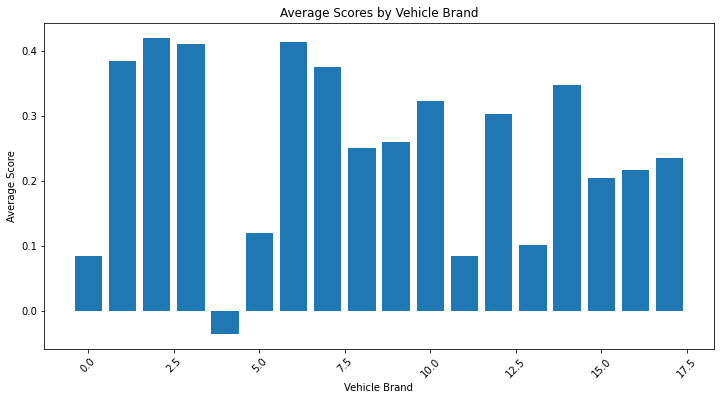

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.bar(avg_sentiment_score['vehicle_brand'], avg_sentiment_score['sentiment_score'])
plt.xlabel('Vehicle Brand')
plt.ylabel('Average Score')
plt.title('Average Scores by Vehicle Brand')
plt.xticks(rotation=45)
plt.show()

In [21]:
"""
As per above graph it looks like vehicke brand 1,2,3,6,7,10,12,14 are most popular based on the ratings
But also realised that the top 10 drivers drove vehicke brand 14
So it may be because their other coposite score was less

Checking for vehicle brand 1, here the driver profitablilty score is in neg, endurabce scroe is +ve
may need more analysis
"""
active_drivers[active_drivers['vehicle_brand'] == 1]

,taxi_group_name,driver_full_name,vehicle_brand,experience_group,awards,endurance_score,profitability_score,safety_adherence_score,efficiency_score,no_of_1_star_rating,no_of_2_star_rating,no_of_3_star_rating,no_of_4_star_rating,no_of_5_star_rating,sentiment_score,composite_score,overall_score
30,"Walsh, Hammond and Craig",Dale Wallace,1,5,0,-1.191650,-0.530803,-1.081330,-0.115491,8,15,33,42,44,0.577982,-0.116168,0.047752
63,Whitehead Inc,Thomas Smith,1,2,0,0.310206,0.427070,-0.685323,0.988877,7,25,35,31,28,0.296703,0.706321,0.160052
75,Whitehead Inc,Derek Lee,1,5,0,-0.448210,0.855437,-0.462991,1.174610,12,20,30,34,31,0.340206,1.067247,0.205128
89,"Fletcher, Gallagher and Blake",Alex Davies,1,3,0,0.092785,0.378396,-0.140077,-0.016365,14,35,40,7,20,-0.289474,0.192559,0.005362
180,Hill and Sons,Damien Smith,1,5,0,-0.289210,0.850437,-0.467991,1.267610,11,23,30,32,34,0.320000,1.129397,0.213852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,Lowe LLC,Teresa Charlton,1,4,0,-0.052880,1.183220,-0.286748,1.932900,10,24,49,32,32,0.306122,1.593976,0.298645
43881,Slater Ltd,Melissa Roberts,1,3,0,-0.696518,0.111505,1.605390,-1.705890,4,36,31,22,24,0.069767,-0.671924,-0.274833
43991,Slater Ltd,George Fletcher,1,5,0,0.120551,-0.765916,0.047370,-0.250446,7,16,26,55,52,0.646154,-0.023321,-0.050720
43997,Slater Ltd,Clifford Watts,1,3,0,-0.666675,-0.139262,0.057434,-0.688385,7,19,28,39,20,0.388235,-0.316614,-0.081876
